In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


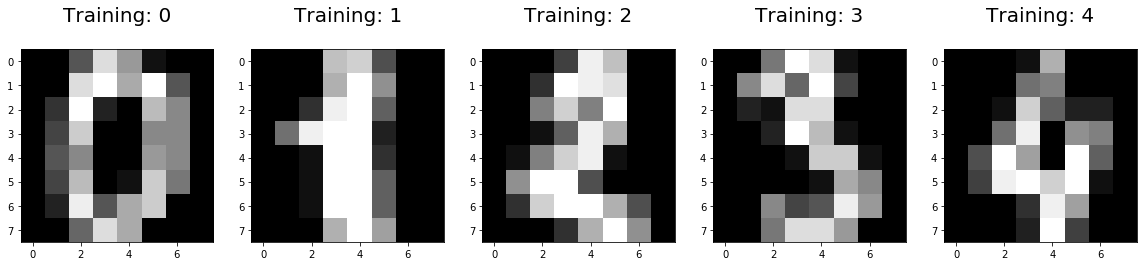

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(label), fontsize = 20)

In [20]:
# split the data into train and test sets using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [21]:
# import Logistic Regression (it's a classification model!)
from sklearn.linear_model import LogisticRegression

In [55]:
# instantiate the model with default values
logisticRegr = LogisticRegression(C=0.01, penalty = 'l2')
# training the model
logisticRegr.fit(x_train, y_train,)
# make predictions on the entire test data
predictions = logisticRegr.predict(X_test)
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9622222222222222


/Users/dianadyakowska/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dianadyakowska/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [57]:
logisticRegr.predict_proba(X_test)[0]

array([1.92424166e-04, 6.60572720e-04, 9.96123860e-01, 6.09533206e-04,
       1.96711087e-05, 1.65642565e-04, 2.75739613e-07, 1.87182080e-03,
       1.72248061e-04, 1.83951942e-04])

In [62]:
for index, (prediction, label) in enumerate(zip(predictions, y_test)):
    if prediction != label:
        print(f'image {index} predicted {prediction}, labeled {label}')

image 94 predicted 4, labeled 7
image 109 predicted 4, labeled 7
image 118 predicted 1, labeled 6
image 124 predicted 1, labeled 8
image 130 predicted 5, labeled 9
image 181 predicted 9, labeled 5
image 196 predicted 1, labeled 8
image 301 predicted 6, labeled 1
image 312 predicted 5, labeled 9
image 315 predicted 7, labeled 4
image 324 predicted 8, labeled 9
image 331 predicted 8, labeled 1
image 335 predicted 2, labeled 8
image 378 predicted 8, labeled 3
image 398 predicted 1, labeled 8
image 430 predicted 9, labeled 3
image 437 predicted 5, labeled 8


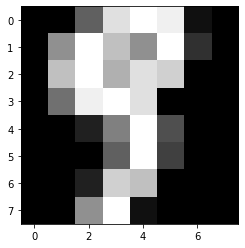

In [89]:
plt.imshow(np.reshape(X_test[312],(8,8)),plt.cm.gray)
#         plt.title('Training: {}\nPredicted: {}'.format(label,prediction), fontsize = 15)

In [163]:
help(svmClassifierLinear)

Help on SVC in module sklearn.svm.classes object:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.linear_model.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  oth

In [90]:
# Now let's use Support Vector Machines Classifier!
# Import classifier
from sklearn.svm import SVC

In [185]:
# use polynomial kernel
svmClassifierLinear = SVC(kernel='poly', C=0.001, gamma = 100)

In [186]:
predictions_svm = svmClassifierLinear.fit(X_train, y_train).predict(X_test)

In [187]:
svmClassifierLinear.score(X_test, y_test)

0.9822222222222222

In [153]:
for index, (prediction, label) in enumerate(zip(predictions_svm, y_test)):
    if prediction != label:
        print(f'image {index} predicted {prediction}, labeled {label}')

image 118 predicted 1, labeled 6
image 124 predicted 1, labeled 8
image 130 predicted 5, labeled 9
image 181 predicted 9, labeled 5
image 196 predicted 1, labeled 8
image 331 predicted 8, labeled 1
image 378 predicted 8, labeled 3
image 398 predicted 1, labeled 8


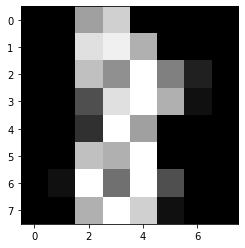

In [195]:
plt.imshow(np.reshape(X_test[196],(8,8)),plt.cm.gray)